In [ ]:
import transformers
import torch

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")

model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

In [ ]:
import spacy 
import re

# load the Spacy English language model
nlp = spacy.load('en_core_web_lg')

# define the path to your file
file_path = '/Users/jomarjordas/Documents/MSFIN299/MSFIN299-Research/_data/17a_exports/MEG_2017.txt'

# open the file and read its contents
with open(file_path, 'r') as f:
    text = f.read()

# process the text with the Spacy nlp pipeline
doc = nlp(text)

# split the text into sentences using Spacy
doc = nlp(text)
sentences = [sent.text.strip() for sent in doc.sents]

# define a regular expression pattern to match one-word sentences
pattern = re.compile(r'^\w+(\s+\w+)*[.?!]$')

# filter out sentences that match the pattern
filtered_sentences = [sent for sent in sentences if not pattern.match(sent)]

# print the filtered sentences
for sent in filtered_sentences:
    print(sent)


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# initialize the FinBERT model and tokenizer
model_name = 'ProsusAI/finbert'
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

for sent in filtered_sentences:
    # tokenize the sentence and add special tokens for classification
    inputs = tokenizer(sent, return_tensors='pt', padding=True, truncation=True)
    # classify the sentiment using the FinBERT model
    outputs = model(**inputs)
    logits = outputs.logits.detach().numpy()[0]
    probs = torch.softmax(outputs.logits, dim=1).tolist()[0]
    # print the sentence and its sentiment scores
    print(f"Sentence: {sent}")
    print(f"Positive sentiment score: {probs[0]:.4f}")
    print(f"Neutral sentiment score: {probs[1]:.4f}")
    print(f"Negative sentiment score: {probs[2]:.4f}")
    print()


In [ ]:
import spacy 
import re
import os
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load the Spacy English language model
nlp = spacy.load('en_core_web_lg')

# Initialize the FinBERT model and tokenizer
model_name = 'ProsusAI/finbert'
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Define the path to the folder containing text files
folder_path = '/Users/jomarjordas/Documents/MSFIN299/MSFIN299-Research/_data/17a_exports/'

# Loop through each file in the folder and process its contents
for file_name in os.listdir(folder_path):
    if file_name.endswith('.txt'):
        # Open the file and read its contents
        with open(os.path.join(folder_path, file_name), 'r') as f:
            text = f.read()

        # Process the text with the Spacy nlp pipeline
        doc = nlp(text)

        # Split the text into sentences using Spacy
        sentences = [sent.text.strip() for sent in doc.sents]

        # Define a regular expression pattern to match one-word sentences
        pattern = re.compile(r'^\w+(\s+\w+)*[.?!]$')

        # Filter out sentences that match the pattern
        filtered_sentences = [sent for sent in sentences if not pattern.match(sent)]

        # Create an empty DataFrame to store the results
        sentiment_df = pd.DataFrame(columns=['sentence', 'positive', 'neutral', 'negative'])

        for sent in filtered_sentences:
            # Tokenize the sentence and add special tokens for classification
            inputs = tokenizer(sent, return_tensors='pt', padding=True, truncation=True)

            # Classify the sentiment using the FinBERT model
            outputs = model(**inputs)
            logits = outputs.logits.detach().numpy()[0]
            probs = torch.softmax(outputs.logits, dim=1).tolist()[0]

            # Save the sentence and its sentiment scores in the DataFrame
            new_row = pd.DataFrame({'sentence': [sent], 'positive': [probs[0]], 'neutral': [probs[1]], 'negative': [probs[2]]})
            sentiment_df = pd.concat([sentiment_df, new_row], ignore_index=True)

        # Save the results to a CSV file with the same name as the input file
        output_file_name = file_name.split('.')[0] + '_sentiment.csv'
        output_file_path = os.path.join(folder_path, output_file_name)
        sentiment_df.to_csv(output_file_path, index=False)

        # print a message to indicate that the file has been processed
        print(file_name, 'has been processed')


In [16]:
import spacy 
import re
import os
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# load the Spacy English language model
nlp = spacy.load('en_core_web_lg')
nlp.max_length = 15000000  # Increase the maximum length limit

# initialize the FinBERT model and tokenizer
model_name = 'ProsusAI/finbert'
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# set a fixed seed for the random number generator
torch.manual_seed(0)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# define the path to your input folder
input_folder = '/Users/jomarjordas/Documents/MSFIN299/MSFIN299-Research/_data/17a_exports'

# define the path to your output folder
output_folder = '/Users/jomarjordas/Documents/MSFIN299/MSFIN299-Research/_data/17a_processed'

# define a regular expression pattern to match one-word sentences
pattern = re.compile(r'^\w+(\s+\w+)*[.?!]$')

# iterate over all files in the input folder
for file_name in os.listdir(input_folder):
    # define the path to the input file
    file_path = os.path.join(input_folder, file_name)
    
    # open the input file and read its contents
    with open(file_path, 'r', encoding='utf-8') as f:
        text = f.read()

    # process the text with the Spacy nlp pipeline
    doc = nlp(text)

    # split the text into sentences using Spacy
    sentences = [sent.text.strip() for sent in doc.sents]

    # filter out sentences that match the pattern
    filtered_sentences = [sent for sent in sentences if not pattern.match(sent)]

    # create an empty DataFrame to store the results
    sentiment_df = pd.DataFrame(columns=['sentence', 'positive', 'neutral', 'negative'])

    for sent in filtered_sentences:
        # tokenize the sentence and add special tokens for classification
        inputs = tokenizer(sent, return_tensors='pt', padding=True, truncation=True)
        # process using CPU
        device = torch.device('cpu')
        model.to(device)
        inputs.to(device)
        # classify the sentiment using the FinBERT model
        outputs = model(**inputs)
        logits = outputs.logits.detach().cpu().numpy()[0]
        probs = torch.softmax(outputs.logits, dim=1).tolist()[0]
        # save the sentence and its sentiment scores in the DataFrame
        new_row = pd.DataFrame({'sentence': [sent], 'positive': [probs[0]], 'neutral': [probs[1]], 'negative': [probs[2]]})
        sentiment_df = pd.concat([sentiment_df, new_row], ignore_index=True)

    # define the path to the output file
    output_file_path = os.path.join(output_folder, file_name.replace('.txt', '.csv'))

    # save the results to a CSV file
    sentiment_df.to_csv(output_file_path, index=False)

    # print a message to indicate that the file has been processed
    print(f"{file_name} has been processed.")


JGS_2021.txt has been processed.
AP_2019.txt has been processed.
SECB_2017.txt has been processed.
LTG_2017.txt has been processed.
AP_2018.txt has been processed.
MEG_2017.txt has been processed.
ALI_2020.txt has been processed.
RLC_2021.txt has been processed.
ICT_2019.txt has been processed.
PGOLD_2017.txt has been processed.
AGI_2018.txt has been processed.


KeyboardInterrupt: 

In [24]:
# export to scrubbed

import spacy
import csv
import os

# Load the English language model in spaCy
nlp = spacy.load('en_core_web_lg')

# Specify the path to the input folder containing the text files
input_folder_path = '/Users/jomarjordas/Documents/MSFIN299/MSFIN299-Research/_data/17a_exports'

# Specify the path to the output folder where the CSV files will be saved
output_folder_path = '/Users/jomarjordas/Documents/MSFIN299/MSFIN299-Research/_data/17a_scrubbed'

# Iterate through all the files in the input folder
for filename in os.listdir(input_folder_path):
    if filename.endswith('.txt'):
        # Extract the ticker from the filename
        ticker = filename.split('_')[0]
        
        # Extract the year from the filename
        year = filename[-8:-4]
        
        # Read the text file and store the content in a variable
        with open(os.path.join(input_folder_path, filename), 'r') as file:
            text = file.read()

        # Process the text with spaCy's English model
        doc = nlp(text)

        # Create an empty list to store the sentences
        sentences = []

        # Loop through each sentence in the document
        for sentence in doc.sents:
            # Remove any leading/trailing white space and new line characters
            sentence_text = sentence.text.strip().replace('\n', ' ')
            # Append the sentence text to the list of sentences
            sentences.append(sentence_text)

        # Use the source file name to create the name of the CSV file
        csv_filename = os.path.splitext(filename)[0] + '.csv'

        # Write the list of sentences along with ticker, year, and filename to a CSV file with the same name as the source file
        with open(os.path.join(output_folder_path, csv_filename), 'w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(['Filename', 'Ticker', 'Year', 'Sentence'])
            for sentence in sentences:
                writer.writerow([filename, ticker, year, sentence])


In [ ]:
another test updated 

In [26]:
import spacy 
import re
import os
import pandas as pd
import torch
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# load the Spacy English language model
nlp = spacy.load('en_core_web_lg')
nlp.max_length = 15000000  # Increase the maximum length limit

# initialize the FinBERT model and tokenizer
model_name = 'ProsusAI/finbert'
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# set a fixed seed for the random number generator
torch.manual_seed(0)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# define the path to your input folder
input_folder = '/Users/jomarjordas/Documents/MSFIN299/MSFIN299-Research/_data/17a_scrubbed'

# define the path to your output folder
output_folder = '/Users/jomarjordas/Documents/MSFIN299/MSFIN299-Research/_data/17a_processed'

# add regular expressions to match "-" and currency symbols
pattern = re.compile(r'^\w+(\s+\w+)*[.?!]?(\s+\$)?(\s+¥)?(\s+€)?(\s+£)?(\s+\u20B1)?(\s+-)?$', re.IGNORECASE)

# iterate over all files in the input folder
for file_name in os.listdir(input_folder):
    # define the path to the input file
    file_path = os.path.join(input_folder, file_name)
    
    # read the csv file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # replace NaN values with empty strings
    df = df.replace(np.nan, '', regex=True)
    
    # get the sentences from the second column of the DataFrame
    sentences = df.iloc[:, 3]

    # filter out sentences that match the pattern
    filtered_sentences = [sent for sent in sentences if not pattern.match(sent)]

    # create an empty DataFrame to store the results
    sentiment_df = pd.DataFrame(columns=['filename', 'ticker', 'year', 'sentence', 'positive', 'neutral', 'negative'])

    # extract the ticker and year from the file name
    file_name_parts = file_name.split('_')
    ticker = file_name_parts[0]
    year = file_name_parts[-1][:4]

    for sent in filtered_sentences:
        # tokenize the sentence and add special tokens for classification
        inputs = tokenizer(sent, return_tensors='pt', padding=True, truncation=True)
        # process using CPU
        device = torch.device('cpu')
        model.to(device)
        inputs.to(device)
        # classify the sentiment using the FinBERT model
        outputs = model(**inputs)
        logits = outputs.logits.detach().cpu().numpy()[0]
        probs = torch.softmax(outputs.logits, dim=1).tolist()[0]
        # save the sentence and its sentiment scores in the DataFrame
        new_row = pd.DataFrame({'filename': [file_name], 'ticker': [ticker], 'year': [year], 'sentence': [sent], 'positive': [probs[0]], 'neutral': [probs[2]], 'negative': [probs[1]]})
        sentiment_df = pd.concat([sentiment_df, new_row], ignore_index=True)

    # define the path to the output file
    output_file_path = os.path.join(output_folder, file_name.replace('.csv', '.csv'))

    # save the results to a CSV file
    sentiment_df.to_csv(output_file_path, index=False)

    # print a message to indicate that the file has been processed
    print(f"{file_name} has been processed.")


AEV_2021.csv has been processed.
GLO_2018.csv has been processed.
GLO_2019.csv has been processed.
AEV_2020.csv has been processed.
BPI_2017.csv has been processed.
URC_2017.csv has been processed.
BDO_2017.csv has been processed.
JFC_2020.csv has been processed.
JFC_2021.csv has been processed.
AC_2017.csv has been processed.
AEV_2018.csv has been processed.
GLO_2021.csv has been processed.
GLO_2020.csv has been processed.
WLCON_2017.csv has been processed.
AEV_2019.csv has been processed.
JGS_2017.csv has been processed.
GTCAP_2019.csv has been processed.
MEG_2020.csv has been processed.
SECB_2021.csv has been processed.
LTG_2021.csv has been processed.
SECB_2020.csv has been processed.
LTG_2020.csv has been processed.
MEG_2021.csv has been processed.
GTCAP_2018.csv has been processed.
RLC_2017.csv has been processed.
PGOLD_2021.csv has been processed.
MBT_2019.csv has been processed.
ACEN_2021.csv has been processed.
MBT_2018.csv has been processed.
ACEN_2020.csv has been processed.

In [91]:
import torch
from transformers import AutoTokenizer, BertForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("textattack/bert-base-uncased-yelp-polarity")
model = BertForSequenceClassification.from_pretrained("textattack/bert-base-uncased-yelp-polarity", problem_type="multi_label_classification")

inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")

with torch.no_grad():
    logits = model(**inputs).logits

predicted_class_ids = torch.arange(0, logits.shape[-1])[torch.sigmoid(logits).squeeze(dim=0) > 0.5]

# To train a model on `num_labels` classes, you can pass `num_labels=num_labels` to `.from_pretrained(...)`
num_labels = len(model.config.id2label)
model = BertForSequenceClassification.from_pretrained(
    "textattack/bert-base-uncased-yelp-polarity", num_labels=num_labels, problem_type="multi_label_classification"
)

labels = torch.sum(
    torch.nn.functional.one_hot(predicted_class_ids[None, :].clone(), num_classes=num_labels), dim=1
).to(torch.float)
loss = model(**inputs, labels=labels).loss

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/520 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

In [ ]:
import re
import os
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import nltk

# download the NLTK tokenizer
nltk.download('punkt')

# initialize the FinBERT model and tokenizer
# model_name = 'ProsusAI/finbert'
# model = AutoModelForSequenceClassification.from_pretrained(model_name)

model_name = "yiyanghkust/finbert-tone"
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# set a fixed seed for the random number generator
torch.manual_seed(0)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# define the path to your input folder
input_folder = '/Users/jomarjordas/Documents/MSFIN299/MSFIN299-Research/_data/17a_exports'

# define the path to your output folder
output_folder = '/Users/jomarjordas/Documents/MSFIN299/MSFIN299-Research/_data/17a_processed'

# define a regular expression pattern to match one-word sentences
pattern = re.compile(r'^\w+(\s+\w+)*[.?!]$')

# iterate over all files in the input folder
for file_name in os.listdir(input_folder):
    # define the path to the input file
    file_path = os.path.join(input_folder, file_name)
    
    # open the input file and read its contents
    with open(file_path, 'r', encoding='utf-8') as f:
        text = f.read()

    # split the text into sentences using NLTK
    sentences = nltk.sent_tokenize(text)

    # filter out sentences that match the pattern
    filtered_sentences = [sent for sent in sentences if not pattern.match(sent)]

    # create an empty DataFrame to store the results
    sentiment_df = pd.DataFrame(columns=['sentence', 'positive', 'neutral', 'negative'])

    for sent in filtered_sentences:
        # tokenize the sentence and add special tokens for classification
        inputs = tokenizer(sent, return_tensors='pt', padding=True, truncation=True)
        # process using CPU
        device = torch.device('cpu')
        model.to(device)
        inputs.to(device)
        # classify the sentiment using the FinBERT model
        outputs = model(**inputs)
        logits = outputs.logits.detach().cpu().numpy()[0]
        probs = torch.softmax(outputs.logits, dim=1).tolist()[0]
        # save the sentence and its sentiment scores in the DataFrame
        new_row = pd.DataFrame({'sentence': [sent], 'positive': [probs[0]], 'neutral': [probs[2]], 'negative': [probs[1]]})
        sentiment_df = pd.concat([sentiment_df, new_row], ignore_index=True)

    # define the path to the output file
    output_file_path = os.path.join(output_folder, file_name.replace('.txt', '.csv'))

    # save the results to a CSV file
    sentiment_df.to_csv(output_file_path, index=False)

    # print a message to indicate that the file has been processed
    print(f"{file_name} has been processed.")


In [90]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline

finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

nlp = pipeline("sentiment-analysis", model=finbert, tokenizer=tokenizer)

sentences = ["Consolidated EBITDA increased by 8% in 2018, primarily due to the fresh contributions from PEC and Hedcor Bukidnon, which commenced commercial operations in March 2018 and July 2018, respectively, and further augmented by higher contributions from GMCP due to higher availability factor in 2018 as compared to the previous year."]
results = nlp(sentences)
print(results)  #LABEL_0: neutral; LABEL_1: positive; LABEL_2: negative


[{'label': 'Positive', 'score': 0.9999780654907227}]


In [89]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline

finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

nlp = pipeline("sentiment-analysis", model=finbert, tokenizer=tokenizer)

sentences = ["there is a shortage of capital, and we need extra financing",  
             "growth is strong and we have plenty of liquidity", 
             "there are doubts about our finances", 
             "profits are flat"]
results = nlp(sentences)
print(results)  #LABEL_0: neutral; LABEL_1: positive; LABEL_2: negative


[{'label': 'Negative', 'score': 0.9966174960136414}, {'label': 'Positive', 'score': 1.0}, {'label': 'Negative', 'score': 0.9999710321426392}, {'label': 'Neutral', 'score': 0.9889442920684814}]


In [3]:
import os
import re
from pdfminer.high_level import extract_text

# set the path to the input folder
input_folder = "/Users/jomarjordas/Documents/MSFIN299/MSFIN299-Research/_data/testing/test_convert_pdf"

# set the path to the output folder
output_folder = "/Users/jomarjordas/Documents/MSFIN299/MSFIN299-Research/_data/testing/test_convert_output"

# create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# iterate over all files in the input folder
for file_name in os.listdir(input_folder):
    # check if the file is a PDF file
    if file_name.endswith(".pdf"):
        # define the path to the input file
        input_file_path = os.path.join(input_folder, file_name)
        
        # define the path to the output file
        output_file_path = os.path.join(output_folder, os.path.splitext(file_name)[0] + ".txt")
        
        # extract the text from the PDF file
        text = extract_text(input_file_path)
        
        # # find the start and end positions of the target section
        # start_pos = text.find("Management’s Discussion and Analysis", text.find("Management’s Discussion and Analysis")+1)
        # end_pos = text.find("Financial Statements and Supplementary Schedules", text.find("Financial Statements and Supplementary Schedules")+1)
        
        # # check if the target section was found
        # if start_pos == -1 or end_pos == -1:
        #     print(f"Target section not found in {file_name}.")
        #     continue
        
        # # extract the target section
        # target_section = text[start_pos:end_pos]
        
        # write the extracted text to the output file
        with open(output_file_path, 'w', encoding='utf-8') as f:
            f.write(text)
        
        # print a message to indicate that the file has been processed
        print(f"PDF file {input_file_path} has been processed and saved as {output_file_path}.")


PDF file /Users/jomarjordas/Documents/MSFIN299/MSFIN299-Research/_data/testing/test_convert_pdf/WLCON_2019.pdf has been processed and saved as /Users/jomarjordas/Documents/MSFIN299/MSFIN299-Research/_data/testing/test_convert_output/WLCON_2019.txt.
PDF file /Users/jomarjordas/Documents/MSFIN299/MSFIN299-Research/_data/testing/test_convert_pdf/WLCON_2018.pdf has been processed and saved as /Users/jomarjordas/Documents/MSFIN299/MSFIN299-Research/_data/testing/test_convert_output/WLCON_2018.txt.
PDF file /Users/jomarjordas/Documents/MSFIN299/MSFIN299-Research/_data/testing/test_convert_pdf/WLCON_2020.pdf has been processed and saved as /Users/jomarjordas/Documents/MSFIN299/MSFIN299-Research/_data/testing/test_convert_output/WLCON_2020.txt.
PDF file /Users/jomarjordas/Documents/MSFIN299/MSFIN299-Research/_data/testing/test_convert_pdf/WLCON_2021.pdf has been processed and saved as /Users/jomarjordas/Documents/MSFIN299/MSFIN299-Research/_data/testing/test_convert_output/WLCON_2021.txt.
PDF 

In [93]:
import csv
import os

input_folder = "/Users/jomarjordas/Documents/MSFIN299/MSFIN299-Research/_data/17a_scrubbed"

# iterate over all CSV files in the input folder
for file_name in os.listdir(input_folder):
    if file_name.endswith(".csv"):
        print(f"Processing CSV file: {file_name}")
        # define the path to the input file
        input_file_path = os.path.join(input_folder, file_name)

        # read the data from the CSV file
        with open(input_file_path, newline='', encoding='utf-8') as fh:
            reader = csv.DictReader(fh)
            rows = list(reader)

        # update the sentences by removing newlines
        for row in rows:
            row['sentence'] = row['sentence'].replace('\n', ' ')

        # write the updated data back to the CSV file
        with open(input_file_path, 'w', newline='', encoding='utf-8') as fh:
            writer = csv.DictWriter(fh, fieldnames=['filename', 'sentence'])
            writer.writeheader()
            writer.writerows(rows)

        print(f"CSV file {input_file_path} has been updated.")


Processing CSV file: AEV_2021.csv
CSV file /Users/jomarjordas/Documents/MSFIN299/MSFIN299-Research/_data/17a_scrubbed/AEV_2021.csv has been updated.
Processing CSV file: GLO_2018.csv
CSV file /Users/jomarjordas/Documents/MSFIN299/MSFIN299-Research/_data/17a_scrubbed/GLO_2018.csv has been updated.
Processing CSV file: GLO_2019.csv
CSV file /Users/jomarjordas/Documents/MSFIN299/MSFIN299-Research/_data/17a_scrubbed/GLO_2019.csv has been updated.
Processing CSV file: AEV_2020.csv
CSV file /Users/jomarjordas/Documents/MSFIN299/MSFIN299-Research/_data/17a_scrubbed/AEV_2020.csv has been updated.
Processing CSV file: BPI_2017.csv
CSV file /Users/jomarjordas/Documents/MSFIN299/MSFIN299-Research/_data/17a_scrubbed/BPI_2017.csv has been updated.
Processing CSV file: BDO_2017.csv
CSV file /Users/jomarjordas/Documents/MSFIN299/MSFIN299-Research/_data/17a_scrubbed/BDO_2017.csv has been updated.
Processing CSV file: AC_2017.csv
CSV file /Users/jomarjordas/Documents/MSFIN299/MSFIN299-Research/_data/17

ValueError: dict contains fields not in fieldnames: 'year', 'ticker'

In [8]:
def replace_newlines_with_space(text):
    text_with_spaces = text.replace('\n', ' ')
    return text_with_spaces

# Usage
text = """
The Philippine government on March 16, 2020, to curb the spread of the corona virus, placed the
whole island of Luzon on enhanced community quarantine (ECQ). which required businesses and
offices to close except for hospitals and other medical services, supermarkets and food deliveries,
and logistics support for medical and food supplies. The company had to close all of its 44 branches
in  Luzon out of 58 total  WDI branches at that time. These branches contributed 84.0% of the
Company's total net sales pre-EGQ.

The ECQ was lifted on May 16, 2020 and WDI re-opened all of its Luzon stores.  The branches
outside of Luzon, meanwhile, were voluntarily closed by the Company for a two-week period from
March 30-31 to April 13-15, 2020 to re-orient and prepare the store operations for the new health and
safety protocols.  Up to the end of 2020, various regions were placed  under different levels of
quarantine depending on the trend of COViD-19 positive cases. Metro Manila with nearby provinces,
for two weeks in August, 2020 was placed back in the second strictest level (MECQ) and while it has been placed under general community quarantine (GCQ) after, it has never graduated to the least
strict, moderate GCQ (MGCQ),

The pandemic and the consequent quarantine measures have greatly impacted the Company's
operations in 2020 with net sales decreasing by 7.5% or P1.847 million to P22,629 million, net income
declined by 31.8% or P676 million to PI ,449 million for the year ended December 31, 2020, from the
P2,125 million reported in 2019.


The Company generated net sales of P22,629 million for the year ended December 31, 2020, 7.5% or
PI ,847 million lower than the P24,476 million  reported in 2019, Comparable sales performance
dropped to negative 13.6% mainly as a result of the temporary closure of stores in Luzon and some
stores in Visayas and Mindanao in the first half and the general impact of the pandemic and the
continuing quarantine measures. Wilcon stores in Luzon, 44 branches out of 58, accounted for 84.0%
of revenues in 2020 pre-ECQ. As of December 31, 2020, the Company had grown to 63 branches, 49
stores are located in Luzon and of the 57 stores aged one year or older, 43 branches are in Luzon.

Its flagship format, the depot, accounted for 97.0% or P21,941 million of the total net sales. The
format's net sales decreased by 6.5% or PI ,528 million from the P23,469 million net sales in 2019,
with a negative same store sales growth of 12.9% for the year.

Net sales generated by the smaller format. "Home Essentials" (HE) stores, comprising the 2.2% or
P510 million of total net sales, likewise reported a downswing of 22.4% or PUS million for the year
from P658 million in 2019 since six out of the seven Home Essentials are located in Metro Manila. All
HEs are in operation for more than a year.

The remaining 0.8% was accounted for by the project sales or sales to major developers, amounting
to PI 78 million, decreasing by 49.2% or PI 72 million in 2020 owing to the suspension of and delays
in the completion of ongoing projects of our institutional accounts.

During the year, the Company opened six new depots, all located in Luzon bringing the total number
of stores to 63 (56 depots and seven home essentials) by the end of 2020. Three stores each were
opened In Southern Luzon and Northern Luzon.

Gross profit closed at P7,782 million, resulting in a gross profit margin of 34.4% for the year ended
December 31, 2020. For the year ended December 31, 2019, gross profit was reported at P8,176
million for a gross profit margin of 33.4%. Gross Profit decreased by P394 million or 4.8% due to the
decrease in sales despite the increase in Gross Profit rate to 34.4%. The hike in Gross Profit rate was
brought about by the increasing  margin and expanding contribution  of in-house and exclusive
products to total net sales. Sales of exclusive and In-house products accounted for 50.9% of total net
sales for the period versus 49.5% in 2019.

Operating expenses increased to P5,738 million for the period, up 6.3% or P342 million from the prior
period's P5,396 million. The increase is traced mainly to expansion-related and pandemic-related
expenses particularly in depreciation and amortization and donations and contributions, respectively.
These upswings were offset by the decrease primarily in utilities, trucking and advertising expense
during the quarantine period. Depreciation and amortization recorded the highest increase at 60.7%
or P687 million as a result of the continuous addition of the company-owned store buildings and the
full year impact of the adoption of the new accounting standard for leases, PFRS 16 - Leases. Non-
PFRS 16 related rent expense dropped 64.8% or P215 million.

Rent concessions obtained by the company from Its lessors were reflected under Other Income.

Interest expense for the years ended December 31, 2020 and 2019 amounted to P429 million and
P300 million, respectively. The PI 29 million increase represents non-cash Interest charged on leased
liability recognized for the period in relation to the adoption by the Company of PFRS 16 on leases.

Other income (charges) for the period ended December 31. 2020 amounted to P435 million, down by
6.9% or P27 million from the P463 million generated In 2019 mainly due to the decrease in interest
income partially offset by the increase in rent income and net other income. Other Income consists of:

1) Rent rancession in 2020 from lessors related to leases of land and buildings resulted in the
reduction in lease liabilities that was recognized in profit or loss amounting to PI 01 million
upon applying the practical expedient of PFRS 16;

2) Rent income from suppliers for the lease of billboards, end caps, etc. totaling P43 million, up 40.7% or PI 2 million year-on-year.

3) Net other income from trade and other suppliers amounting to P236 million, down by 15.8%
or P44 million from 2019 representing net charges for their share of various operational and
promotional/marketing expenses and other non-merchandise sales related income; and
4) Interest income of P55 million decreased from the prior period balance of PI 51 million as the iPO proceeds continue to be deployed for expansion purposes.


In 2019, the re-classification of lease expenses qualified under PFRS 16 - Leases from rent expense
to depreciation and amortization and interest expense resulted in a 68.2% jump in EBITDA and 31.7%
in EBIT year-on-y^r. Adjusting the 2020 and 2019 depreciation and amortization to exclude right-of-
use (ROU) depreciation and interest expense to exclude interest on lease liability and consider these
as rent expense, EBITDA and EBIT are as follows:

1) EBITDA for the year ended December 31, 2020 totaled P2,694 million, or 11.9% of net sales,
declining by 15.9% or P509 million from the 2019 balance of P3,203 million, or 13.1% of net
sales.

2) EBIT for the year 2020 is PI .995 million or 8.8% of net sales, sliding by 28.5% or P796 million

year-on-year from the prior year's level of P2,791 million, or 11.4% of net sales

The downswing in  both EBITDA and EBIT are largely due to the impact of the pandemic and
quarantine measures.


The Company's income tax expense decreased by 26.5% or P217 million to end at P601 million in
2020, versus P818 million incurred during 2019 in view of lower taxable income.

Results of Operations for the quarter ended December 31. 2020 compared with quarter ended
December 31. 2019

WDI generated net income of P563 million, down 3.0% or PI 8 million year-on-year traced mainly to
the drop in interest income.  Excluding interest Income, earnings will be slightly up by 1.1% or P6
million from P549 to P555 million year-on-year.

The Company recorded net sales of P6,840 million for the three-month period ended December 31,
2020, 6.2% or P399 million higher than the P6,441 million for the same period in 2019. The increase
is mainly due to opening of six new stores. Comparable sales performance dropped only to negative
0.5%, which is almost flat despite the impact of the pandemic and continued implementation of
quarantine measures.
Sales from the depot-format stores contributed the majority of total net sales comprising 97.1% or
P6,641 million for the fourth quarter of 2020, up by 7A% or P456 million from the P6,185 million net
sales for the fourth quarter of 2019. The depot's same store sales growth is almost flat at 0.4%.

The smaller format "Home Essentials", recording net sales of P151 million accounting for 2.2% of net
sales, reported a decline of 9.2% or PI 5 million during the fourth quarter of 2020 from prior year's
same period level of PI 66 million.

The remaining 0.7% was accounted for by project sales or sales to major developers, amounting to
P48 million, decreasing by 46.0% or P41 million from prior year's same period level of 2019 of P90
million.

The Company has opened two new depots in the last quarter of 2020 which are both located in Luzon
(Olongapo and San Juan, Taytay).

Gross profit closed at P2,346 million, resulting in a gross profit margin of 34.3% for the fourth quarter
of 2020 from the P2,264 million level during the same period in 2019. Sales of exclusive and in-house
products accounted for 49.8% of total net sales for the period versus 60.4% in the same period in
2019.

Operating expenses increased to PI ,625 million during the fourth quarter of 2020, up 9.4% or PI 39
million from the P1,486 million during the same period in 2019. The increase is mainly expansion-
related  particularly in  depreciation and amortization. Depreciation and amortization recorded the
highest increase at 36.1% or PI 34 million as a result of the continuous addition of the company-
owned store buildings and the full year impact of the adoption of the new accounting standard for
leases, PFRS 16- Leases.

Rent concessions obtained by the company from its lessors were reflected under Other Income.

Interest expense during the fourth quarter of 2020 and 2019 amounted to P112 million and P92
million, respectively. The P20 million increase represents non-cash interest charged on leased liability
recognized for the period in relation to the adoption by the Company of PFRS 16 on leases.

Other income (charges) during the fourth quarter of 2020 amounted to PI 93 million, up by 45.4% or
P60 million from the PI 33 million generated in 2019 due to the recognition of the rent concession
obtained from lessors related to leases of land and buildings, which resulted in the reduction in lease
liabilities amounting to PI 01 million, and the increase in rent income. The hike was partly offset by
the decrease in net other income and interest income.

Adjusting  the  2020 and  2019 depreciation  and  amortization  to  exclude  right-of-use (ROU)
depreciation and interest expense to exclude interest on lease liability and consider these as rent
expense, EBITDA and EBIT are as follows;

1) EBITDA for the quarter ended December 31, 2020 totaled P989 million, or 14.5% of net sales,
up by 8.4% or P77 million from the 2019 balance of P912 million, or 14.2% of net sales.
2) EBIT for the fourth quarter of 2020 ts P792 million or 11.6% of net sales, almost flat at 0.8%
or P6 million higher from the prior year's same period level of P786 million, or 12.2% of net
sales.

The Company's Income tax expense Is almost flat at 0.1% or P0.2 million to end at P237.7 million in
2020, versus P237.5 million Incurred during 2019.

Capital expenditure for 2020 totaled P2,503 million. The bulk (68.0%) was spent on new stores, while
the remainder was spent on warehouses, extensions and renovations (24.4%), and Furniture
Equipment, and IT Software (7.6%).

WDI's financial position remained solid as at December 31, 2020 notwithstanding the effect of the
pandemic and quarantine measures on Its operations. Its healthy financial condition will still enable It
to pursue Its expansion plans.

Cash and cash equivalents and short-term Investments totaled P4,611 million by the end of 2020,
higher by 6.4% or P279 million than the total of cash and cash equivalents, short term Investments
and Investment In  retail treasury bond (matured in  April 2020) balance of P4,332 million  as at
December 31, 2019. This resulted In a current ratio of 1.89:1.00 in 2020, lower than the 2.08:1.00 in
view of the lower Inventory level partly offset by the lower accounts payable balance.

The company's liabilities consist mostly of trade payables and lease liabilities recognized pursuant to
the adoption of PFRS 16 - Leases.  WDI has remained practically bank debt-free, with a debt-to-
equity ratio of 0.84:1.00.

1.  Aggregate cash and short-term investments Increased by P2,532 million or 121.8% from
P2,079 million at the close of 2019 to P4,611 million as at December 31, 2020, traceable
primarily to the maturity of the retail treasury bonds holdings of the Company, partially offset
by payment of dividends, lease, trade and other payables and income tax.

2.  Trade and other receivables totaled P416 million as at December 31, 2020, 5.4% or P24
million lower than the P440 million balance as at December 31, 2019. The decrease was
mainly due to decrease in trade receivables partially offset with the Increase in advances
made to suppliers.

3.  Merchandise Inventories decreased by P825 million or 8.7% from P9,518 million at the close

of 2019 to P8,692 million as at December 31,2020 due mainly to lower purchases.

4.  Other Current Assets decreased by P62 million or 8.5% from P733 million at the close of
2019 to P671 million as at December 31, 2020 due mainly of utilization of Input tax and
application of prepayments.

5.  Property and equipment increased by PI ,776 million or 35.7% from P4,981 million at the
close of 2019 to P6,757 million as at December 31, 2020 due mainly to capital expenditures
related to store networi< expansion.

6.  Net deferred tax assets increased by P80 million or 24.1% from P334 million at the close of
2019 to P414 million as at December 31, 2020 due mainly to the tax effect of temporary
differences on net lease rental payments.

7. Other noncurrent assets decreased by P263 million or 41.2% from P639 million at the close of
2019 to P376 million as at December 31, 2020 due mainly to decrease in  advances to
contractors partially offset by procurement of IT Software.

8.  Lease liability including non-current portion increased by PI .300 million or 23.7% from P5,486
million at the close of 2019 to P6,787 as at December 31, 2020 due to lease liabilities in
relation to PFRS 16 for new leases.

9.  Net retirement liability increased by P62 million or 22.4% from P276 million at the close of
2019 to P337 million as at December 31, 2020 due mainly to increase in liabilities as a result
of prevailing discount rates in 2020.

10. Other comprehensive income decreased by P63 million or 99.1 % from P63 million at the
close of 2019 to P0.6 million as at December 31, 2020 due to remeasurement loss on
retirement liability  and reversal of unrealized  gain  upon maturity of investment in  retail
treasury bond.

1.  Net sales for the year 2020 amounted to P22,629 million, 7.5% or PI ,847 million lower than
the P24,476 million generated during the same period in 2019 mainly due to comparable
sales performance drop to negative 13.6% as a result of the temporary closure of stores in
Luzon and some stores in Visayas and Mindanao from March 17 to May 15, 2020 during the
quarantine period.

2.  Gross profit decreased by 4.8% to P7,782 million for the year from the P8,176 million level for
the same period in 2019, corresponding to the decrease in sales in existing stores during the
ECQ period.
3.  Operating expenses Increased to P5,738 million for the year, up 6.3% or P342 million from
the prior period's P5,396 million. The increase is attributable mainly to expansion-related
expenses, depreciation  and amortization  of new stores and the adoption  of Philippine
Financial Reporting Standard (PFRS) 16, Leases of new lease contracts subsequent to
September 30, 2019 offset by the decrease in  utilities, trucking, outsourced services and
advertising expense during the quarantine period.  Depredation and amortization recorded
the highest increase at 60.7% or P687 million as a result of the continuous addition of the
company-owned  store  buildings  and  the  re-classification  of  part  of rent  expense to
depreciation. Non-PFRS 16 related rent expense dropped by 64.8% or P215 million to P117
million.

4.  Interest expense increased to P429 million for the year from the prior year's P300 million,
representing non-cash interest charged on lease liability recognized for the period in relation
to the adoption by the Company of PFRS 16 on leases.

5.  Other income (charges) for the year totaled P435 million, down by 5.9% or P27 million from
the P463 million recorded in the same period of 2019 mainly due to the decrease in interest
income and net other income partially offset by rent concession.

6.  The Company's income tax expense decreased by 26.5% or P217 million to end at P601

million from the P818 million incurred in the prior year in view of lower taxable income.

7.  In view mainly of the temporary closure of the majority of the stores of the Company from
March 17 to May 15, 2020 resulting in a decrease in net sales, net income declined by 31.8%
or P676 million to PI ,449 million for the year 2020 from the P2,125 million reported in 2019.

Income Statement for the quarter ended December 31, 2020 compared with quarter ended
December 31, 2019

1. Net sales for the fourth quarter ended December 31, 2020 amounted to P6,840 million, 6.2%
or P399 million higher than the P6,441 million generated during the same period in 2019
mainly due to six new stores opened in 2020.

2.  Gross profit increased by 3.6% to P2,346 million for the period from the P2,264 million level
for the same period in 2019, mainly driven by the increase in sales due to six new stores in
2020.

3.  Operating expenses increased to PI ,625 million for the period, up 9.4% or PI 39 million from
the prior period's P1,486 million. The increase is attributable  mainly to expansion-related
expenses, depreciation  and amortization  of new stores. Depreciation  and amortization
recorded the highest increase at 36.1% or PI 34 million as a result of the continuous addition
of the company-owned store buildings and the re-classification of part of rent expense to
depredation.

4.  Interest expense increased to P112 million for the period, up by 21.6% or P20 million from the
prior year's P92 million, representing non-cash interest charged on lease liability recognized
for the period in relation to the adoption by the Company of PFRS 16 on leases.

5.  Other income (charges) for the period totaled PI 93 million, up by 45.4% or P60 million from
the PI 33 million recorded in the same period of 2019 mainly due to rent concession partially
offset by the decrease in interest income and net other income.

There are no known trends or events that will trigger any direct or contingent financial obligation that
is material to the Company, including any default or acceleration of an obligation.
There are no material off-balance sheet transactions, arrangements, obligations (including
contingent obligations), and other relationships of the Company with unconsolidated entries or other
persons that was created during the reporting period.

Description of any material commitments for capital expenditures, general purpose of such
commitments for capital expenditure, expected sources for such expenditures.

There are no known regulatory or material contractual commitments of the Company for 2020.

The Company, pursuant to its expansion plans has allocated approximately P2.8B for additional
stores/branches, warehouses, acquisition  of vehicles and equipment, and renovations of select
stores.

The continuing  economic growth, not only of highly developed and  urbanized  regions of the
Philippines but of emerging cities and provinces outside the national capital and its immediate
surrounding regions has presented  a vast potential for growth for the Company.  Thus, the
Company's growth plan is to expand in these locations, in which most Wilcon Depot has scarce to no
presence yet.

In  these emerging cities  and provinces, the  home improvement space more particularly  the
construction finishing materials niche is still dominated by traditional trade. As the economy of these
areas develops and the purchasing power of the market strengthens, demand for more convenient
and improved shopping experience, variety especially of higher quality products and overall better
customer service are expected to continually grow.  Entry and success of current and upcoming
Wilcon stores in these growing areas coupled with the aforesaid continuous economic growth of these
markets, it  is expected that more modem trade channels for the home improvement space will
gradually flourish, shifting the balance and the competitive landscape.

There is no seasonal aspect that has material effect on the financial statements.

The reliability of the Company's financial statements as at and for the period endinq December
31,2020.

The Company made a representation through its filing of SEC Form 17A (Annual Report)
which contains the audited financial statements, of its responsibility for the preparation and
fair presentation of such financial statements in accordance with the Philippine Financial
Reporting Standards. Management also assumes responsibility for Internal  control as it
deterrnines necessary to enable the preparation of financial statements that are free from
material misstatement, whether due to fraud or error. The Company's extemal auditor, Reyes
Tacandong & Co. provided an opinion that the Company's financial statements are presented
fairly, in all material respect.

The Company, through its  Compliance Officer made representation  of the absence of
significant breach of laws and regulations or Involvement in any governmental, legal orarbitration proceedings that may have a material effect on the Company's business, financial
position or profitability.

The Treasurer attested to the submission of all financial and reportorial requirements to
pertinent institutions and agencies of government.

Sound internal control and compliance system are in place in the Company.

The Company had not noted or reported any significant control gaps or weaknesses that
would Imperil or materially affect the achievement of its goals and objectives.

The Company's Chief Audit Executive reported to the Audit Committee the results of its audits
in 2020, including control and risk matters that are of financial, operational, and compliance in
nature together with the corresponding actions implemented by the Company.

The Company is  authorized  under  Philippine  law  to  declare  dividends,  subject  to  certain
requirements. The payment of dividends, either in the form of cash or shares, will depend upon the
Company's earnings, cash flow and financial condition, among other factors. The Company may
declare dividends only out of its unrestricted retained earnings. These represent the net accumulated
earnings of the Company with its  unimpaired capital, which are not appropriated for any other
purpose. The Company may pay dividends in cash, by the distribution of property, or by the Issue of
shares. Dividends paid in cash or property are subject to the approval by the Board of Directors.
Dividends paid in the form of additional shares are subject to approval by both the Board of Directors
and at least two-thirds of the outstanding share capital of the shareholders at a shareholders' meeting
called for such purpose.

The Company has approved a dividend policy of maintaining an annual cash and/or share dividend pay-out of up to 25% of its net profit after tax from the preceding year, subject to the requirements of applicable laws and regulations, the terms and conditions of its outstanding bonds and loan facilities, and the absence of circumstances that may restrict the payment of such dividends, such as where the Company undertakes major projects and developments. Dividends must be approved by the Board (and shareholders In  case of a share dividend declaration) and may be declared only from the unrestricted retained eamings of the Company. The Company's Board of Directors may, at any time, modify the Company's dividend policy, depending upon the Company's capital expenditure plans and/or any terms of financing facilities entered into to fund Its cun'ent and future operations and projects. The Company can give no assurance that it will pay any dividends in the future. 

On 22 May 2017, the Board of Directors approved the adoption of the Revised Manual on Corporate
Governance in accordance with the SEC Memorandum Circular No. 19 Series of 2016.

The Company understands that It Is paramount to set the kind of corporate governance needed In the
attainment of the Company's corporate goals.

The Revised Manual on Corporate Governance was designed to define the framework of rules,
systems and processes that govems the performance of the Board of Directors (the Board) and
Management. It  establishes the structure by which the Company executes and carries out its
Corporate Governance. This serves as reference by all the members of the Board as well as its
Management in the conduct of their duties and responsibilities.

The Board  of  Directors  and  Management, employees  and  shareholders, believe  that  good
govemance is a necessary component of what constitutes sound strategic business management and
will therefore undertake every effort necessary to create awareness thereof within the organization.

With the aid of its committees, the Board of Directors shall be primarily responsible for the govemance
of the Corporation and shall, hence, ensure compliance with the principles of good corporate
govemance.

To strictly observe and implement the provisions of this Manual, corresponding penalties shall be
imposed, after notice and hearing, on the Corporation's directors, officers, staff, subsidiaries, and
affiliates and their respective directors, officers, and staff in case of violation of any of the provisions of
the Manual.

On 7 August 2019, In compliance with SEC Memorandum Circular No. 10 Series of 2019, Rules on
Material Related Party Transactions for Publicly Listed Companies, the Board approved its Material
Related Party Transactions Policy and accordingly revised its Related Party Transactions Committee
Charter.

On May 6, 2020, the Board of Directors of the Corporation approved the amendments to its Corporate
Governance Manual in compliance with the Revised Corporation Code and related issuances. The
Board also approved the amendments to the By-laws of the Corporation in compliance with the
Revised Corporation Code and related issuances, as follows:

1. Allowing the attendance, participation and voting in the meetings of the stockholders
through remote communication or in absentia in accordance with the procedures prescribed
by the Corporation and relevant laws and regulation

2. Composition of the Board and Creation of an Emergency Board

3. Election of a Compliance Officer and;

4. Delegating to the Board the power to amend the by-laws for purposes of complying with
best practices, subsequent requirements of law/and or regulatory bodies.

The amendments to the By-laws were ratified by the stockholders during the annual stockholders'
meeting held on September 21, 2020.
"""

text_with_spaces = replace_newlines_with_space(text)
print(text_with_spaces)


 The Philippine government on March 16, 2020, to curb the spread of the corona virus, placed the whole island of Luzon on enhanced community quarantine (ECQ). which required businesses and offices to close except for hospitals and other medical services, supermarkets and food deliveries, and logistics support for medical and food supplies. The company had to close all of its 44 branches in  Luzon out of 58 total  WDI branches at that time. These branches contributed 84.0% of the Company's total net sales pre-EGQ.  The ECQ was lifted on May 16, 2020 and WDI re-opened all of its Luzon stores.  The branches outside of Luzon, meanwhile, were voluntarily closed by the Company for a two-week period from March 30-31 to April 13-15, 2020 to re-orient and prepare the store operations for the new health and safety protocols.  Up to the end of 2020, various regions were placed  under different levels of quarantine depending on the trend of COViD-19 positive cases. Metro Manila with nearby provinc

In [12]:
import os
import csv
import nltk

# set the path to the input folder
input_folder = "/Users/jomarjordas/Documents/MSFIN299/MSFIN299-Research/_data/testing"

# set the path to the output folder
output_folder = "/Users/jomarjordas/Documents/MSFIN299/MSFIN299-Research/_data/testing"

# create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# initialize the NLTK sentence tokenizer
nltk.download('punkt')
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

# iterate over all files in the input folder
for file_name in os.listdir(input_folder):
    # define the path to the input file
    file_path = os.path.join(input_folder, file_name)
    
    # open the input file and read its contents
    with open(file_path, 'r', encoding='utf-8') as f:
        text = f.read()

    # split the text into sentences using NLTK
    sentences = tokenizer.tokenize(text)

    # create a list of tuples, where each tuple contains the filename and a sentence
    rows = [(file_name, sent.strip()) for sent in sentences]

    # define the path to the output file
    output_file_path = os.path.join(output_folder, file_name.replace('.txt', '.csv'))

    # write the list of tuples to a CSV file
    with open(output_file_path, 'w', encoding='utf-8', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['filename', 'sentence'])
        writer.writerows(rows)

    # print a message to indicate that the file has been processed
    print(f"{file_name} has been processed.")


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jomarjordas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 1201: invalid start byte

In [14]:
import spacy 
import re
import os
import pandas as pd
import torch
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# load the Spacy English language model
nlp = spacy.load('en_core_web_lg')

# initialize the FinBERT model and tokenizer
model_name = 'ProsusAI/finbert'
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# set a fixed seed for the random number generator
torch.manual_seed(0)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# define the path to your input folder
input_folder = '/Users/jomarjordas/Documents/MSFIN299/MSFIN299-Research/_data/testing'

# define the path to your output folder
output_folder = '/Users/jomarjordas/Documents/MSFIN299/MSFIN299-Research/_data/testing'

# add regular expressions to match "-" and currency symbols
pattern = re.compile(r'^\w+(\s+\w+)*[.?!]?(\s+\$)?(\s+¥)?(\s+€)?(\s+£)?(\s+\u20B1)?(\s+-)?$', re.IGNORECASE)

# iterate over all files in the input folder
for file_name in os.listdir(input_folder):
    # define the path to the input file
    file_path = os.path.join(input_folder, file_name)
    
    # read the text file
    with open(file_path, 'r') as file:
        text = file.read()
    
    # scrub the text (modify this part according to your requirements)
    # For example, you can use regex or other text cleaning techniques here
    scrubbed_text = text.lower()  # Example: converting text to lowercase
    
    # define the path to save the scrubbed text
    scrubbed_file_path = os.path.join(output_folder, f"scrubbed_{file_name}")
    
    # save the scrubbed text to a file
    with open(scrubbed_file_path, 'w') as file:
        file.write(scrubbed_text)
    
    # read the scrubbed text file into a pandas DataFrame
    df = pd.DataFrame({'sentence': [scrubbed_text]})
    
    # get the sentences from the DataFrame
    sentences = df['sentence']
    
    # filter out sentences that match the pattern
    filtered_sentences = [sent for sent in sentences if not pattern.match(sent)]
    
    # create an empty DataFrame to store the results
    sentiment_df = pd.DataFrame(columns=['sentence', 'positive', 'neutral', 'negative'])

    for sent in filtered_sentences:
        # tokenize the sentence and add special tokens for classification
        inputs = tokenizer(sent, return_tensors='pt', padding=True, truncation=True)
        # process using GPU
        device = torch.device('mps')
        model.to(device)
        inputs.to(device)
        # classify the sentiment using the FinBERT model
        outputs = model(**inputs)
        logits = outputs.logits.detach().mps().numpy()[0]
        probs = torch.softmax(outputs.logits, dim=1).tolist()[0]
        # save the sentence and its sentiment scores in the DataFrame
        new_row = pd.DataFrame({'sentence': [sent], 'positive': [probs[0]], 'neutral': [probs[2]], 'negative': [probs[1]]})
        sentiment_df = pd.concat([sentiment_df, new_row], ignore_index=True)

    # define the path to the output file
    output_file_path = os.path.join(output_folder, file_name.replace('.txt', '.csv'))

    # save the results to a CSV file
    sentiment


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 1201: invalid start byte

In [ ]:
# Create a pandas DataFrame from the results list
df = pd.DataFrame(sentiment_df)

# Add a column for the total sentence count
df['sentence_count'] = len(filtered_sentences)

# Add a column for the total token count
df['token_count'] = df['sentence'].apply(lambda x: len(x.split()))

output_dir_path = '/Users/jomarjordas/Documents/MSFIN299/MSFIN299-Research/_data/17a_exports'
output_file_name = 'sent_lvl.csv'
output_file_path = os.path.join(output_dir_path, output_file_name)

# save to csv
df.to_csv(output_file_path, index=False)

df = df.sort_values('year', ascending=False)
df


Error reading file: /Users/jomarjordas/Documents/MSFIN299/MSFIN299-Research/_data/17a_processed/.DS_Store. Skipping... Error: "None of [Index(['positive', 'neutral', 'negative'], dtype='object')] are in the [columns]"


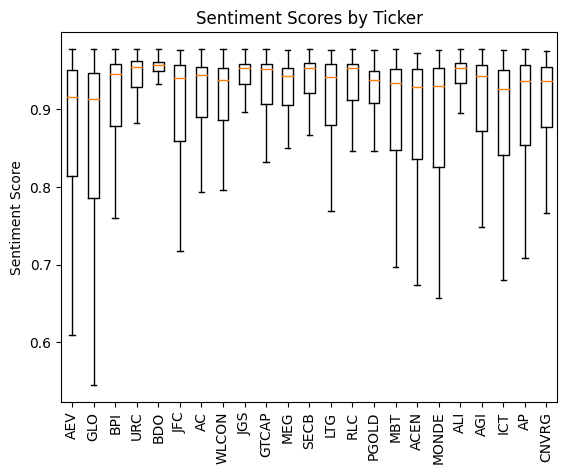

In [33]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to your folder containing CSV files
folder_path = '/Users/jomarjordas/Documents/MSFIN299/MSFIN299-Research/_data/17a_processed'

# Define a dictionary to hold the sentiment scores for each ticker
ticker_sentiment_scores = {}

# Iterate over the files in the folder
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)

    try:
        # Read the CSV file with the appropriate encoding
        df = pd.read_csv(file_path, encoding='latin1')

        # Get the maximum sentiment score among positive, neutral, and negative columns
        sentiment_scores = df[['positive', 'neutral', 'negative']].max(axis=1)

        # Get the ticker from the file name
        ticker = file_name.split('_')[0]

        # Add sentiment scores to the corresponding ticker
        if ticker not in ticker_sentiment_scores:
            ticker_sentiment_scores[ticker] = []

        ticker_sentiment_scores[ticker].extend(sentiment_scores)
    except Exception as e:
        print(f"Error reading file: {file_path}. Skipping... Error: {str(e)}")

# Create separate box plots for each ticker
fig, ax = plt.subplots()
data = [ticker_scores for ticker_scores in ticker_sentiment_scores.values()]
labels = [ticker for ticker in ticker_sentiment_scores.keys()]
ax.boxplot(data, labels=labels, showfliers=False)  # Set showfliers to False
ax.set_ylabel('Sentiment Score')
ax.set_title('Sentiment Scores by Ticker')
plt.xticks(rotation=90)
plt.show()


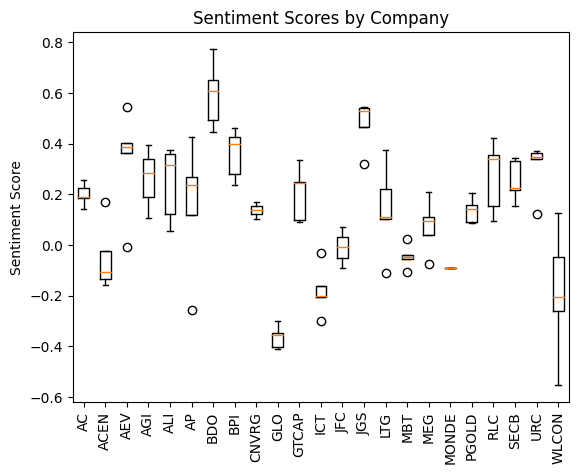

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to your specific CSV file
file_path = '/Users/jomarjordas/Documents/MSFIN299/MSFIN299-Research/_data/17a_exports/sent_lvl.csv'

# Read the CSV file
df = pd.read_csv(file_path)

# Group the data by the company column
grouped_data = df.groupby('ticker')['sentiment_score_corpus'].apply(list)

# Create a list of data and labels for box plots
data = grouped_data.values
labels = grouped_data.index.tolist()

# Create separate box plots for each company
fig, ax = plt.subplots()
ax.boxplot(data, labels=labels)
ax.set_ylabel('Sentiment Score')
ax.set_title('Sentiment Scores by Company')
plt.xticks(rotation=90)
plt.show()


In [41]:
import os
import pandas as pd

# Define the path to your folder containing the CSV files
folder_path = '/Users/jomarjordas/Documents/MSFIN299/MSFIN299-Research/_data/17a_processed'

# Create an empty DataFrame to store the combined data
combined_df = pd.DataFrame()

# Iterate over all files in the folder
for file_name in os.listdir(folder_path):
    # Define the path to the input file
    file_path = os.path.join(folder_path, file_name)
    
    try:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_path)
        
        # Extract the ticker and year from the file name
        ticker, year = file_name.split('.')[0].split('_')
        
        # Add ticker and year columns to the DataFrame
        df['ticker'] = ticker
        df['year'] = year
        
        # Append the DataFrame to the combined DataFrame
        combined_df = combined_df.append(df, ignore_index=True)
        
    except (pd.errors.ParserError, UnicodeDecodeError):
        # Skip files with parsing errors or UnicodeDecodeError
        print(f"Skipping file {file_path} due to parsing error")

# Sort the combined DataFrame by positive sentiment score in descending order
combined_df = combined_df.sort_values('positive', ascending=False)

# Extract the top ten sentences with the highest positive sentiment score and their scores,
# along with their ticker and year information
top_positive_sentences = combined_df.head(10)[['sentence', 'positive', 'ticker', 'year']]

# Sort the combined DataFrame by negative sentiment score in descending order
combined_df = combined_df.sort_values('negative', ascending=False)

# Extract the top ten sentences with the highest negative sentiment score and their scores,
# along with their ticker and year information
top_negative_sentences = combined_df.head(10)[['sentence', 'negative', 'ticker', 'year']]

# Export the results to a CSV file
output_file_path = '/Users/jomarjordas/Documents/MSFIN299/MSFIN299-Research/_data/sent_score_check.csv'
top_positive_sentences.to_csv(output_file_path, index=False, header=['Positive Sentence', 'Positive Score', 'Ticker', 'Year'])
top_negative_sentences.to_csv(output_file_path, mode='a', index=False, header=['Negative Sentence', 'Negative Score', 'Ticker', 'Year'])


Skipping file /Users/jomarjordas/Documents/MSFIN299/MSFIN299-Research/_data/17a_processed/.DS_Store due to parsing error


/var/folders/s3/vv9psq2d7nb0zc29tlx4z90m0000gn/T/ipykernel_26787/2905969929.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
/var/folders/s3/vv9psq2d7nb0zc29tlx4z90m0000gn/T/ipykernel_26787/2905969929.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
/var/folders/s3/vv9psq2d7nb0zc29tlx4z90m0000gn/T/ipykernel_26787/2905969929.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
/var/folders/s3/vv9psq2d7nb0zc29tlx4z90m0000gn/T/ipykernel_26787/2905969929.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futur